In [3]:
from ibmm import EyeClassifier
# from ibmm_online import EyeClassifierOnline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import cm

from parser_utils import read_periph_recording, parse_new_dreyevr_rec, GetGazeDeviationFromHead
from pathlib import Path
from tqdm import tqdm
import pickle as pkl

In [4]:
from scipy.spatial.transform import Rotation as R

In [5]:
%matplotlib ipympl

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
import sys
sys.path.append(".\\dreyevr_parser")

In [8]:
from dreyevr_parser.parser import parse_file
from typing import Dict, List, Any
from utils import (
    check_for_periph_data,
    convert_to_df,
    split_along_subgroup,
    get_good_idxs,
)
from visualizer import plot_versus

In [9]:
from dreyevr_attn_NDT_utils import load_dreyevr_data_and_gazeevent_annotate, load_dreyevr_dataframe, add_gaze_event2df, get_hits_and_misses

In [10]:
# path_to_recording = "C://carla//carla.periph//OtherExptRecordings/NDT_ben1.txt"
# path_to_recording = "C://carla//carla.periph//OtherExptRecordings/NDT_aj2.txt"
# path_to_recording = "C://carla//carla.periph//OtherExptRecordings/NDT_testAngleFC.txt"

NDT_rec_root =  "C://carla//carla.periph//NDTExptRecordings/"
paths_to_recording = list(Path(NDT_rec_root).glob("NDT*.txt"))
# path_to_recording = "C://carla//carla.periph//OtherExptRecordings/NDT_testAllan_5_17_25_50.txt"
# path_to_recording = "C://carla//carla.periph//OtherExptRecordings/NDT_testPK_5_12_1.txt"
path_to_recording = "C://carla//carla.periph//NDTExptRecordings/NDT_testMichelle_5_17_10_70.txt"
# path_to_recording = "C://carla//carla.periph//OtherExptRecordings/NDT_Maggie_16_10_70.txt"

recording_name = Path(path_to_recording).stem
recdf_pklname = Path("temp_data").joinpath(recording_name+".pkl")

In [11]:
path_to_recording

'C://carla//carla.periph//NDTExptRecordings/NDT_testMichelle_5_17_10_70.txt'

In [12]:
ecc_hits_agg = []
ecc_misses_agg = []
pitch_hits_agg=[]
pitch_miss_agg=[]
yaw_hits_agg=[]
yaw_miss_agg=[]

for path_to_recording in paths_to_recording:
    print("Processing ", path_to_recording.stem)
    df_new, og_df, CA_df = load_dreyevr_dataframe(path_to_recording)
    hits_and_misses = get_hits_and_misses(og_df, CA_df)
    ecc_hits = []
    ecc_misses = []
    pitch_hits = []
    yaw_hits = []
    pitch_misses = []
    yaw_misses = []
    for ctr, target_tuple in enumerate(hits_and_misses):
        if target_tuple[1] is False:
            pitch_misses += [target_tuple[0].gaze2target_pitch*180/np.pi]
            yaw_misses += [target_tuple[0].gaze2target_yaw*180/np.pi]
            ecc_misses += [np.linalg.norm([yaw_misses[-1], pitch_misses[-1]])]
        else:
            pitch_hits += [target_tuple[0].gaze2target_pitch*180/np.pi]
            yaw_hits += [target_tuple[0].gaze2target_yaw*180/np.pi]
            ecc_hits += [np.linalg.norm([yaw_hits[-1], pitch_hits[-1]])]
            
    ecc_hits_agg += ecc_hits
    ecc_misses_agg += ecc_misses
    pitch_hits_agg+= pitch_hits
    pitch_miss_agg+= pitch_misses
    yaw_hits_agg+= yaw_hits
    yaw_miss_agg+= yaw_misses


Processing  NDT_Maggie_16_10_70
Loaded data from cache\NDT_Maggie_16_10_70.pkl
gathered periph data in 0.034s
created DReyeVR df in 0.030s
created DReyeVR df in 0.174s


52it [00:00, 84.42it/s]


Processing  NDT_Maggie_16_25_50
Loaded data from cache\NDT_Maggie_16_25_50.pkl
gathered periph data in 0.036s
created DReyeVR df in 0.077s
created DReyeVR df in 0.221s


37it [00:00, 76.29it/s]


Processing  NDT_Maggie_16_25_70
Loaded data from cache\NDT_Maggie_16_25_70.pkl
gathered periph data in 0.029s
created DReyeVR df in 0.024s
created DReyeVR df in 0.137s


46it [00:00, 116.16it/s]


Processing  NDT_testAbhijat_5_17_05_50
Loaded data from cache\NDT_testAbhijat_5_17_05_50.pkl
gathered periph data in 0.029s
created DReyeVR df in 0.026s
created DReyeVR df in 0.193s


27it [00:00, 73.37it/s]


Processing  NDT_testAbhijat_5_17_10_35
Loaded data from cache\NDT_testAbhijat_5_17_10_35.pkl
gathered periph data in 0.030s
created DReyeVR df in 0.026s
created DReyeVR df in 0.146s


21it [00:00, 65.42it/s]


Processing  NDT_testAbhijat_5_17_10_70
Loaded data from cache\NDT_testAbhijat_5_17_10_70.pkl
gathered periph data in 0.026s
created DReyeVR df in 0.024s
created DReyeVR df in 0.180s


47it [00:00, 91.80it/s]


Processing  NDT_testAllan_5_17_10_35
Loaded data from cache\NDT_testAllan_5_17_10_35.pkl
gathered periph data in 0.038s
created DReyeVR df in 0.036s
created DReyeVR df in 0.229s


26it [00:00, 73.24it/s]


Processing  NDT_testAllan_5_17_10_70
Loaded data from cache\NDT_testAllan_5_17_10_70.pkl
gathered periph data in 0.031s
created DReyeVR df in 0.029s
created DReyeVR df in 0.208s


51it [00:00, 99.60it/s] 


Processing  NDT_testAllan_5_17_25_50
Loaded data from cache\NDT_testAllan_5_17_25_50.pkl
gathered periph data in 0.029s
created DReyeVR df in 0.024s
created DReyeVR df in 0.142s


37it [00:00, 114.91it/s]


Processing  NDT_testAna_5_17_10_35
Loaded data from cache\NDT_testAna_5_17_10_35.pkl
gathered periph data in 0.032s
created DReyeVR df in 0.030s
created DReyeVR df in 0.212s


22it [00:00, 72.72it/s]


Processing  NDT_testAna_5_17_10_50
Loaded data from cache\NDT_testAna_5_17_10_50.pkl
gathered periph data in 0.030s
created DReyeVR df in 0.027s
created DReyeVR df in 0.148s


29it [00:00, 78.38it/s]


Processing  NDT_testAna_5_17_25_50
Loaded data from cache\NDT_testAna_5_17_25_50.pkl
gathered periph data in 0.027s
created DReyeVR df in 0.065s
created DReyeVR df in 0.135s


31it [00:00, 103.68it/s]


Processing  NDT_testBen_5_12_1
Loaded data from cache\NDT_testBen_5_12_1.pkl
gathered periph data in 0.032s
created DReyeVR df in 0.029s
created DReyeVR df in 0.209s


27it [00:00, 95.07it/s]


Processing  NDT_testBen_5_12_2
Loaded data from cache\NDT_testBen_5_12_2.pkl
gathered periph data in 0.032s
created DReyeVR df in 0.027s
created DReyeVR df in 0.199s


34it [00:00, 93.92it/s]


Processing  NDT_testMichelle_5_17_10_50
Loaded data from cache\NDT_testMichelle_5_17_10_50.pkl
gathered periph data in 0.031s
created DReyeVR df in 0.026s
created DReyeVR df in 0.150s


32it [00:00, 64.52it/s]


Processing  NDT_testMichelle_5_17_10_70
Loaded data from cache\NDT_testMichelle_5_17_10_70.pkl
gathered periph data in 0.029s
created DReyeVR df in 0.026s
created DReyeVR df in 0.196s


43it [00:00, 75.18it/s]


Processing  NDT_testPK_5_12_1
Loaded data from cache\NDT_testPK_5_12_1.pkl
gathered periph data in 0.030s
created DReyeVR df in 0.027s
created DReyeVR df in 0.140s


27it [00:00, 76.70it/s]


Processing  NDT_testThomas_5_16_10_70
Loaded data from cache\NDT_testThomas_5_16_10_70.pkl
gathered periph data in 0.047s
created DReyeVR df in 0.084s
created DReyeVR df in 0.261s


74it [00:01, 49.87it/s]


Processing  NDT_testThomas_5_16_25_50
Loaded data from cache\NDT_testThomas_5_16_25_50.pkl
gathered periph data in 0.043s
created DReyeVR df in 0.087s
created DReyeVR df in 0.205s


42it [00:00, 54.12it/s]


Processing  NDT_testThomas_5_16_25_70
Loaded data from cache\NDT_testThomas_5_16_25_70.pkl
gathered periph data in 0.039s
created DReyeVR df in 0.084s
created DReyeVR df in 0.179s


54it [00:00, 63.91it/s]


In [13]:
# histogram params
num_bins=15
plot_density = True

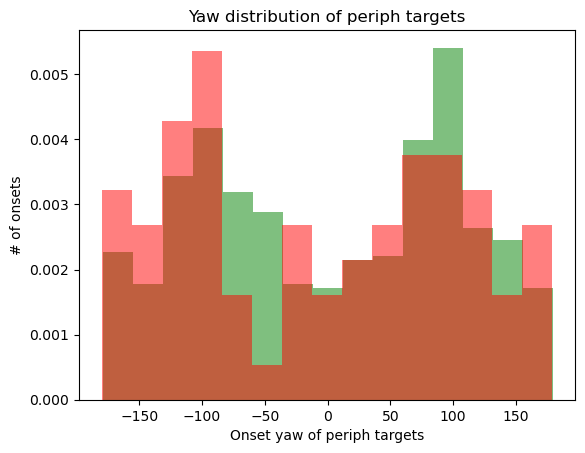

In [14]:
# do this aggregation after you go through all of them
fig = plt.figure()
y_hits, y_hits_bins, _ = plt.hist(yaw_hits_agg, alpha=0.5, label="hits", density=plot_density, bins=num_bins, color='g')
y_miss, y_miss_bins, _ = plt.hist(yaw_miss_agg, alpha=0.5, label="misses", density=plot_density, bins=num_bins, color='r')
if plot_density:
    plt.title("Yaw distribution of periph targets")
else:
    plt.title("Yaw counts of periph targets")
plt.xlabel("Onset yaw of periph targets")
plt.ylabel("# of onsets")

# ax.set_title("Eccentricity distribution of periph targets")
# ax.set_xlabel("onset eccentricity of periph targets")
# ax.set_ylabel("# of onsets")
fig

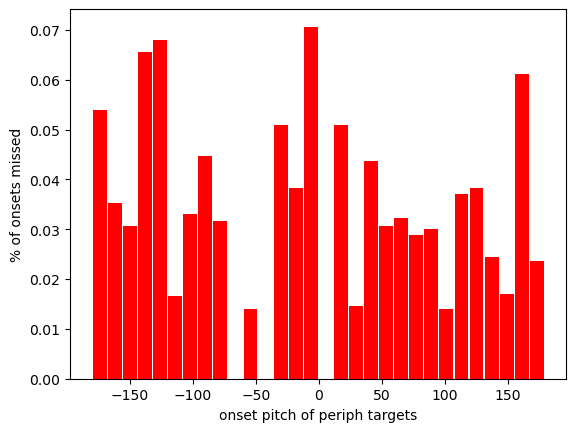

In [119]:
# do this aggregation after you go through all of them
fig = plt.figure()
y_miss_by_appearance = y_miss / (y_hits + y_miss)
y_miss_by_appearance = y_miss_by_appearance / y_miss_by_appearance.sum()
y_bin_centers = y_miss_bins[:-1] + np.diff(y_miss_bins)/2
plt.bar(y_bin_centers, y_miss_by_appearance, width=11, color='red')
plt.xlabel("onset pitch of periph targets")
plt.ylabel("% of onsets missed")

# ax.set_title("Eccentricity distribution of periph targets")
# ax.set_xlabel("onset eccentricity of periph targets")
# ax.set_ylabel("# of onsets")
fig

In [115]:
# PITCHES

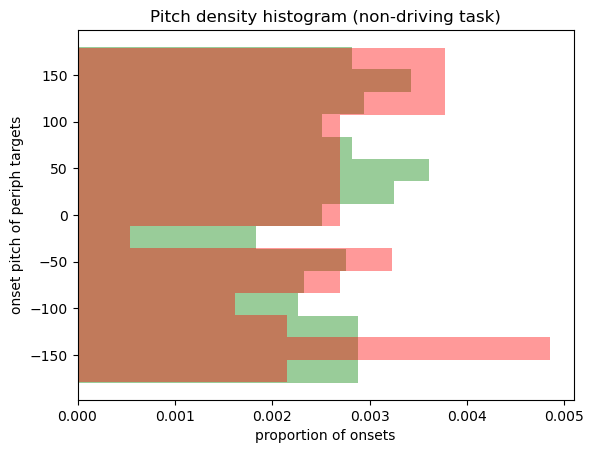

In [25]:
# do this aggregation after you go through all of them
fig = plt.figure()
p_hits, p_hits_bins, _ = plt.hist(pitch_hits_agg, alpha=0.4, label="hits", density=plot_density, bins=num_bins, color='g', orientation='horizontal')
p_miss, p_miss_bins, _ = plt.hist(pitch_miss_agg, alpha=0.4, label="misses", density=plot_density, bins=num_bins, color='r', orientation='horizontal')

if plot_density:
    plt.title("Pitch density histogram (non-driving task)")
else:
    plt.title("Pitch counts of periph targets")
plt.ylabel("onset pitch of periph targets")
plt.xlabel("proportion of onsets")

# ax.set_title("Eccentricity distribution of periph targets")
# ax.set_xlabel("onset eccentricity of periph targets")
# ax.set_ylabel("# of onsets")
fig

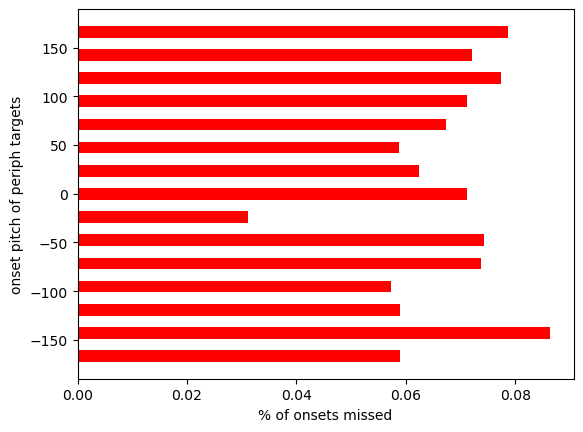

In [26]:
# do this aggregation after you go through all of them
fig = plt.figure()
p_miss_by_appearance = p_miss / (p_hits + p_miss)
p_miss_by_appearance = p_miss_by_appearance / p_miss_by_appearance.sum()
p_bin_centers = p_miss_bins[:-1] + np.diff(p_miss_bins)/2
# plt.bar(p_bin_centers, p_miss_by_appearance, width=17, color='orange')
plt.barh(p_bin_centers, p_miss_by_appearance, height=np.diff(p_miss_bins)/2, color='red')
plt.ylabel("onset pitch of periph targets")
plt.xlabel("% of onsets missed")

# ax.set_title("Eccentricity distribution of periph targets")
# ax.set_xlabel("onset eccentricity of periph targets")
# ax.set_ylabel("# of onsets")
fig

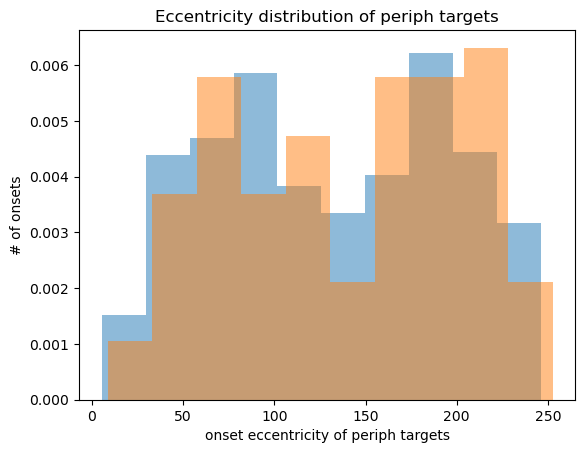

In [17]:
# do this aggregation after you go through all of them
fig = plt.figure()
plt.hist(ecc_hits_agg, alpha=0.5, label="hits", density=True)
plt.hist(ecc_misses_agg, alpha=0.5, label="misses", density=True)
plt.title("Eccentricity distribution of periph targets")
plt.xlabel("onset eccentricity of periph targets")
plt.ylabel("# of onsets")

# ax.set_title("Eccentricity distribution of periph targets")
# ax.set_xlabel("onset eccentricity of periph targets")
# ax.set_ylabel("# of onsets")
fig

In [ ]:
# normalized graphs 

## Prelim analysis

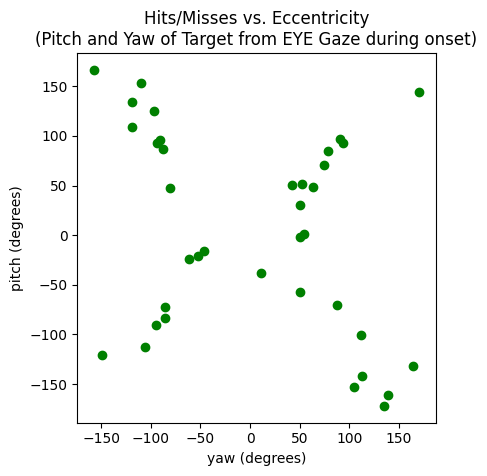

In [12]:
# Preliminary analysis
fig, ax = plt.subplots()

# plots of hits misses vs ecc
for target_tuple in hits_and_misses:
    target_response = True
    if target_tuple[1] is False:
        # miss
        target_response = False
        pass
    else:
        # hits
        pass
        # print(target_tuple[1].ButtonPressed)
    ax.scatter(target_tuple[0].gaze2target_yaw*180/np.pi,
               target_tuple[0].gaze2target_pitch*180/np.pi,
               c='g' if target_response else 'r')
    ax.set_title("Hits/Misses vs. Eccentricity\n(Pitch and Yaw of Target from EYE Gaze during onset)")
    
    # ax.scatter(target_tuple[0].head2target_yaw*180/np.pi, target_tuple[0].head2target_pitch*180/np.pi, c='g' if target_response else 'r')
    # ax.set_title("Hits/Misses vs. Eccentricity\n(Pitch and Yaw of Target from HEAD Gaze during onset)")
    
    ax.set_xlabel("yaw (degrees)")
    ax.set_ylabel("pitch (degrees)")
    # ax.set_xlim(-60, 60)
    # ax.set_ylim(-40, 60)
    ax.set_aspect('equal')
    # ax.show()
fig

## Gaze event detection (gaze vector/gaze+head only)


In [13]:
from ibmm import EyeClassifier
from ibmm_online import EyeClassifierOnline

In [14]:
gazeORgazeHead = "gazeHead"
dist_method="vector" # vector or euclid

In [15]:
df2 = og_df.copy()
if gazeORgazeHead == "gaze":
    df2['Lgaze_x'] = og_df.GazeDir_LEFT.apply(lambda x: x[0])
    df2['Lgaze_y'] = og_df.GazeDir_LEFT.apply(lambda x: x[1])
    df2['Lgaze_z'] = og_df.GazeDir_LEFT.apply(lambda x: x[2])

    df2['Rgaze_x'] = og_df.GazeDir_RIGHT.apply(lambda x: x[0])
    df2['Rgaze_y'] = og_df.GazeDir_RIGHT.apply(lambda x: x[1])
    df2['Rgaze_z'] = og_df.GazeDir_RIGHT.apply(lambda x: x[2])


    LgazeRaySplitDF = pd.DataFrame(df2[['Lgaze_x', 'Lgaze_y', 'Lgaze_z']])
    LgazeRaySplitDF.rename(columns={'Lgaze_x': 'x', 'Lgaze_y': 'y', 'Lgaze_z': 'z'}, inplace=True)
    LgazeRaySplitDF['timestamp'] = df2["TimeElapsed"]
    LgazeRaySplitDF['confidence'] = df2["EyeOpennessValid_LEFT"].astype(bool) # remove all gazes where an eye was closed

    RgazeRaySplitDF = pd.DataFrame(df2[['Rgaze_x', 'Rgaze_y', 'Rgaze_z']])
    RgazeRaySplitDF.rename(columns={'Rgaze_x': 'x', 'Rgaze_y': 'y', 'Rgaze_z': 'z'}, inplace=True)
    RgazeRaySplitDF['timestamp'] = df2["TimeElapsed"]
    RgazeRaySplitDF['confidence'] = df2["EyeOpennessValid_RIGHT"].astype(bool) # remove all gazes where an eye was closed
    
    velL = EyeClassifier.preprocess(LgazeRaySplitDF, dist_method=dist_method)
    velL.velocity = velL.velocity.astype(float)
    velR = EyeClassifier.preprocess(RgazeRaySplitDF, dist_method=dist_method)
    velR.velocity = velR.velocity.astype(float)
    model = EyeClassifier()
    model.fit(eyes=(velL, velR))
    labels, indiv_labels = model.predict(eyes=(velL, velR))
    labels_unique = labels[1::2]
    
elif gazeORgazeHead == "gazeHead":
    # add approx head compensation
    df2['Cgaze_x'] = og_df.GazeDir_COMBINED.apply(lambda x: x[0])
    df2['Cgaze_y'] = og_df.GazeDir_COMBINED.apply(lambda x: x[1])
    df2['Cgaze_z'] = og_df.GazeDir_COMBINED.apply(lambda x: x[2])

    # gaze+head values
    gaze_pitches, gaze_yaws = GetGazeDeviationFromHead(df2.Cgaze_x, df2.Cgaze_y, df2.Cgaze_z)
    head_rots = df2.CameraRot.values
    head_pitches =   df2.CameraRot.apply(lambda x: x[0])
    head_yaws = df2.CameraRot.apply(lambda x: x[2])
    gaze_head_pitches = gaze_pitches + head_pitches
    gaze_head_yaws = gaze_yaws + head_yaws       

    # Create the new pd
    gazeHeadDF = pd.DataFrame(df2[['TimeElapsed']])
    gazeHeadDF = gazeHeadDF.rename(columns={'TimeElapsed':'timestamp'})
    gazeHeadDF['confidence'] = (df2.EyeOpennessValid_LEFT*df2.EyeOpennessValid_RIGHT).astype(bool)
    gazeHeadDF['x'] = gaze_head_pitches
    gazeHeadDF['y'] = gaze_head_yaws
    gazeHeadDF['z'] = np.zeros(len(gaze_head_pitches))
    
    vel_w = EyeClassifier.preprocess(gazeHeadDF, dist_method=dist_method)
    model = EyeClassifier()
    model.fit(world=vel_w)
    # raw_vel = vel_w[np.logical_not(vel_w.velocity.isna())].velocity.values
    # raw_vel[raw_vel > raw_vel.mean() + 3 * raw_vel.std()]
    # print("Velocity Means: ",model.world_model.means_)
    
    labels, indiv_labels = model.predict(world=vel_w)
    labels_unique = labels

In [16]:
# 0- fix, 1- sac, -1 -> noise
labels_unique.index = np.arange(1, len(labels_unique) + 1) # start index from 1 instead of 0
labels_np = labels_unique.to_numpy()
# add the labels to the original df:
recdf_with_labels = df2.join(labels_unique["label"])

In [17]:
print("Num fixation total pts: ", np.sum(labels_np[:,2]))
print("Num saccades total pts: ", np.sum(labels_np[:,3]))
print("Num noise total pts: ", np.sum(labels_np[:,4]))
print()
# filter the consecutives
print("Num fixations: ", np.sum(np.diff(labels_np[:, 2]) == 1))
print("Num saccades: ", np.sum(np.diff(labels_np[:, 3]) == 1))
print("Num noise: ", np.sum(np.diff(labels_np[:, 4]) == 1))
print("Num targets spawned: ", num_targets_spawned)

Num fixation total pts:  9965.0
Num saccades total pts:  383.0
Num noise total pts:  70.0

Num fixations:  213
Num saccades:  210
Num noise:  10
Num targets spawned:  37


## OFD vs FC movement analysis

In [18]:
# find all fixation cross movement points
FC_df = CA_df[CA_df.CustomActor_Name == "PeriphCross"].copy()
FC_df.loc[:, "CustomActor_Location"] = FC_df.loc[:, "CustomActor_Location"].apply(np.asarray) 
FC_move_true = (FC_df.CustomActor_Location.diff().apply(np.sum) != 0.0)
FC_move_idcs = (FC_move_true == True)
num_FC_moves= FC_move_idcs.sum()

In [24]:
TC = FC_df.loc[FC_df[FC_move_true].index[0], "TimestampCarla"]
FC_move_idx = og_df[og_df.TimestampCarla==TC].index
camera_rot = R.from_euler('xyz', # UE4 rotators are pitch roll yaw
                          np.array(og_df.loc[FC_move_idx, "CameraRotAbs"].squeeze()), degrees=True)

# at numFCmoves = 0 --> trying to calculate FC location from Camera location vs where it actually was
# not sure if this is correct
CrossVector = camera_rot.apply([1,0,0]);
FixCrossLoc = og_df.loc[FC_move_idx, "CameraLocAbs"].squeeze() + CrossVector * 3 * 100;
print(np.allclose(FixCrossLoc, FC_df.loc[FC_move_idx, "CustomActor_Location"].squeeze(), atol=0.3))
print(FixCrossLoc)
print(FC_df.loc[FC_move_idx, "CustomActor_Location"].squeeze())

False
[-26718.0338813   20498.20995915  -6046.92906847]
[-26723.424  20572.68   -6015.071]


In [21]:
# find all fixation indexrts
# for each, find when the gaze comes some threshold nearby the FC location
for idx in FC_df[FC_move_true].index:
    TC = FC_df.loc[idx, "TimestampCarla"]
    FC_move_idx = og_df[og_df.TimestampCarla==TC].index
    FC_new_loc = FC_df.loc[idx, "CustomActor_Location"]
    # print("\nidx: ", idx)
    print("Time elapsed: ", og_df.loc[FC_move_idx, "TimeElapsed"])
    ctr = 0
    while True:
        # Gaze_origin_abs = CameraLoc + EgoSensor->GetData()->GetGazeOrigin(DReyeVR::Gaze::COMBINED);
        Gaze_origin_abs = np.array(og_df.loc[FC_move_idx+ctr, "GazeOrigin_COMBINED"].squeeze()) \
                            + np.array(og_df.loc[FC_move_idx+ctr, "CameraLocAbs"].squeeze())
        # Gaze_dir_rel = EgoSensor->GetData()->GetGazeDir(DReyeVR::Gaze::COMBINED);
        Gaze_dir_rel = np.array(og_df.loc[FC_move_idx+ctr, "GazeDir_COMBINED"].squeeze()) #[None,:]
        
        # Gaze_posn_rel = CameraRot.RotateVector(Gaze_dir_rel);
        # Gaze_posn_abs = Gaze_origin_abs + Gaze_posn_rel;
        # Need to rotate by CameraRotAbs to get GazeOrigin2FC_vec vector in the camera(head) frame
        camera_rot = R.from_euler('xyz', np.array(og_df.loc[FC_move_idx+ctr, "CameraRotAbs"].squeeze()), degrees=True)
        Gaze_posn_rel = camera_rot.apply(Gaze_dir_rel)
        
        FC_dir = FC_new_loc - Gaze_origin_abs
        dot_prod = np.dot(FC_dir/np.linalg.norm(FC_dir), Gaze_posn_rel/np.linalg.norm(Gaze_posn_rel))
        angle = np.arccos(dot_prod)
        # print(angle)
        
        if ctr % 5 == 0:            
            # print(GazeOrigin2FC_vec)
            print(ctr, angle)
            # print(pitch, yaw)
        if ctr == 50:
            break
        ctr += 1        
    # break

Time elapsed:  0    0.0
Name: TimeElapsed, dtype: float64
0 0.3318637173152124
5 0.30599007032528674
10 0.3069025868792457
15 0.31057833606101554
20 0.31263312527390197
25 0.3098167521558946
30 0.34199532482817013
35 0.33903099022314304
40 0.33056549624398984
45 0.32738142578619545
50 0.32652974125727985
Time elapsed:  103    2.93882
Name: TimeElapsed, dtype: float64
0 0.35810327745376946
5 0.352642601731589
10 0.36767220819447116
15 0.35348699597228805
20 0.32214194594649187
25 0.2712793639279314
30 0.24642278927740296
35 0.24406091379583614
40 0.26255336804562995
45 0.2663312173429451
50 0.26695709780079785
Time elapsed:  249    6.8345
Name: TimeElapsed, dtype: float64
0 0.3246506504616063
5 0.3194591751115931
10 0.30674841261325764
15 0.2792230776261267
20 0.19760648650246349
25 0.18486572231059287
30 0.17997967919013158
35 0.17627912875915236
40 0.18083161183641525
45 0.19209278095717422
50 0.1883584601131455
Time elapsed:  364    9.90363
Name: TimeElapsed, dtype: float64
0 0.31759

In [22]:
plt.figure()
plt.scatter(FC_df[FC_move_true].TimestampCarla, np.ones(17,))
plt.scatter(FC_df[FC_move_true].TimestampCarla, np.ones(17,))
plt.show()

ValueError: x and y must be the same size

## OFD analysis

In [60]:
# need a data format that stores:
# all the data from hits and misses
# what trial/recording file it corresponds to: recording_name -- this is also stored in the pkl name
# 

46/47 valid targets
41 fixation onsets, 5 sacc, 0 noise


Text(0.5, 1.0, 'Hits/Misses on Gaze Eccentricity vs. OFD')

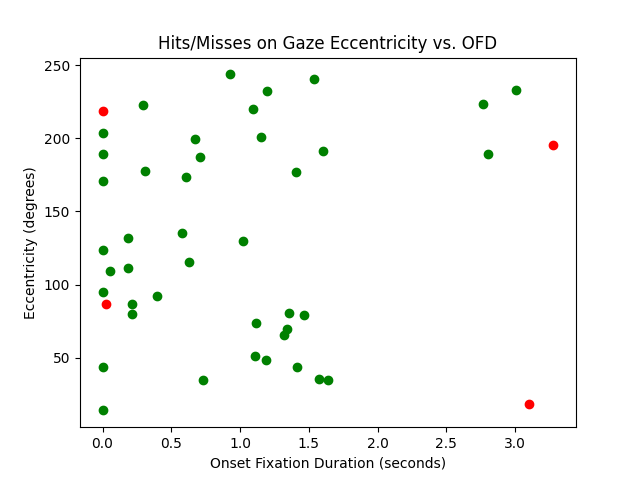

In [268]:
# target tuples, go back and find labels
saccade_onsets = 0
fixation_onsets = 0
noise_onsets = 0
fig, ax = plt.subplots()
graph_tuples = []

for target_tuple in hits_and_misses:
    # for either hit or miss, go back and find the ofd
    # check if you're in a fixation rn
    if target_tuple[0].GazeValid_COMBINED==0: # check gaze validity 
        continue
    target_locindf = target_tuple[0].name
    onset_gaze_event = recdf_with_labels.loc[target_locindf].label  
    OFD = 0
    pitch = recdf_with_labels.loc[target_locindf].gaze2target_pitch
           # + recdf_with_labels.loc[target_locindf].head2target_pitch
    yaw = recdf_with_labels.loc[target_locindf].gaze2target_yaw 
           # + recdf_with_labels.loc[target_locindf].head2target_yaw
    
    if onset_gaze_event == 0:
        fixation_onsets += 1
        # go back and look at when this current fixation ends
        # labels going back from current gaze
        labels_upto_curr = recdf_with_labels.loc[target_locindf::-1].label 
        np.diff(labels_upto_curr)
        labels_upto_curr = recdf_with_labels.loc[target_locindf::-1].label 
        label_diff = np.diff(labels_upto_curr)!=0
        first_fixation_idx = target_locindf - np.argmax(label_diff)
        OFD = recdf_with_labels.loc[target_locindf].TimeElapsed -\
                recdf_with_labels.loc[first_fixation_idx].TimeElapsed
        
        eccentricity = np.linalg.norm([recdf_with_labels.loc[target_locindf].gaze2target_pitch,
                                      recdf_with_labels.loc[target_locindf].gaze2target_yaw])*180/np.pi
        ax.scatter(OFD, eccentricity, c='r' if target_tuple[1] is False else 'g')
        graph_tuples += (OFD, eccentricity, target_tuple[1] is False, pitch, yaw)
    elif onset_gaze_event == 1:
        saccade_onsets += 1
        OFD = 0        
        eccentricity = np.linalg.norm([recdf_with_labels.loc[target_locindf].gaze2target_pitch,
                                      recdf_with_labels.loc[target_locindf].gaze2target_yaw])*180/np.pi
        ax.scatter(OFD, eccentricity, c='r' if target_tuple[1] is False else 'g')
        graph_tuples += (OFD, eccentricity, target_tuple[1] is False, pitch, yaw)
    else:
        noise_onsets += 1
    # print(target_locindf, OFD)
print("{}/{} valid targets".format(
        fixation_onsets+saccade_onsets+noise_onsets,
        len(hits_and_misses)))
print("{} fixation onsets, {} sacc, {} noise".format(fixation_onsets, saccade_onsets, noise_onsets))

#plt.xlim(0, )
# ax.set_ylim(-1, 60)
ax.set_xlabel("Onset Fixation Duration (seconds)")
ax.set_ylabel("Eccentricity (degrees)")
ax.set_title("Hits/Misses on Gaze Eccentricity vs. OFD")

In [17]:
# temp hack for henny meeting: save graph tuples
graph_data_filname = Path("temp_data").joinpath(recording_name+"_OFDvEcc.pkl")
with open(graph_data_filname, 'wb') as f:
    pkl.dump(graph_tuples, f)

# Saccade amplitude analysis


12/12 valid targets
11 fixation onsets, 1 sacc, 0 noise


Text(0.5, 1.0, 'Hits/Misses on Gaze Eccentricity vs. OFD')

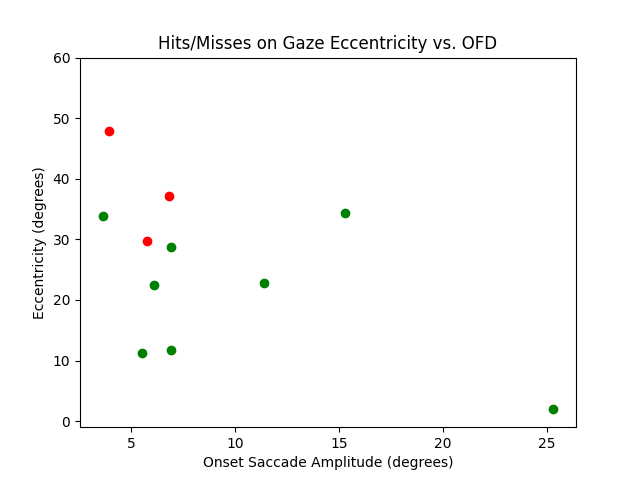

In [80]:
# target tuples, go back and find labels
saccade_onsets = 0
fixation_onsets = 0
noise_onsets = 0
fig, ax = plt.subplots()
graph_tuples = []

for target_tuple in hits_and_misses:
    # for either hit or miss, go back and find the ofd
    # check if you're in a fixation rn
    if target_tuple[0].GazeValid_COMBINED==0: # check gaze validity 
        continue
    target_locindf = target_tuple[0].name
    onset_gaze_event = recdf_with_labels.loc[target_locindf].label  
    OSA = 0
    pitch = recdf_with_labels.loc[target_locindf].gaze2target_pitch
           # + recdf_with_labels.loc[target_locindf].head2target_pitch
    yaw = recdf_with_labels.loc[target_locindf].gaze2target_yaw 
           # + recdf_with_labels.loc[target_locindf].head2target_yaw
    
    if onset_gaze_event == 0:
        fixation_onsets += 1
        # go back and look at when this current fixation ends
        # labels going back from current gaze
        labels_upto_curr = recdf_with_labels.loc[target_locindf::-1].label 
        label_diff = np.diff(labels_upto_curr)!=0
        first_fixation_idx = target_locindf - np.argmax(label_diff) # first fixation of this idx
        
        labels_upto_curr = recdf_with_labels.loc[target_locindf::-1].label 
        rev_fix_idcs = np.where(labels_upto_curr==0)
        last_nonfix_offset = np.where(np.diff(rev_fix_idcs)>1)[1][0]# where is the break in the fixation
        last_fixend_idx = rev_fix_idcs[0][last_nonfix_offset+1]
        # onset saccade idx
        OSA = np.linalg.norm(recdf_with_labels.loc[target_locindf].GazeDir_COMBINED - recdf_with_labels.loc[last_fixend_idx].GazeDir_COMBINED)*180/np.pi
        
                
        eccentricity = np.linalg.norm([recdf_with_labels.loc[target_locindf].gaze2target_pitch,
                                      recdf_with_labels.loc[target_locindf].gaze2target_yaw])*180/np.pi
        ax.scatter(OSA, eccentricity, c='r' if target_tuple[1] is False else 'g')
        graph_tuples += (OSA, eccentricity, target_tuple[1] is False, pitch, yaw)
        
    elif onset_gaze_event == 1:
        saccade_onsets += 1
        # OFD = 0        
        # eccentricity = np.linalg.norm([recdf_with_labels.loc[target_locindf].gaze2target_pitch,
        #                               recdf_with_labels.loc[target_locindf].gaze2target_yaw])*180/np.pi
        # ax.scatter(OFD, eccentricity, c='r' if target_tuple[1] is False else 'g')
        # graph_tuples += (OFD, eccentricity, target_tuple[1] is False, pitch, yaw)
    else:
        noise_onsets += 1
    # print(target_locindf, OFD)
print("{}/{} valid targets".format(
        fixation_onsets+saccade_onsets+noise_onsets,
        len(hits_and_misses)))
print("{} fixation onsets, {} sacc, {} noise".format(fixation_onsets, saccade_onsets, noise_onsets))

#plt.xlim(0, )
ax.set_ylim(-1, 60)
ax.set_xlabel("Onset Saccade Amplitude (degrees)")
ax.set_ylabel("Eccentricity (degrees)")
ax.set_title("Hits/Misses on Gaze Eccentricity vs. OFD")

# OFD analysis with Eye gaze + Head compensation

In [192]:
df2 = og_df.copy()
df2['Lgaze_x'] = og_df.GazeDir_LEFT.apply(lambda x: x[0])
df2['Lgaze_y'] = og_df.GazeDir_LEFT.apply(lambda x: x[1])
df2['Lgaze_z'] = og_df.GazeDir_LEFT.apply(lambda x: x[2])

df2['Rgaze_x'] = og_df.GazeDir_RIGHT.apply(lambda x: x[0])
df2['Rgaze_y'] = og_df.GazeDir_RIGHT.apply(lambda x: x[1])
df2['Rgaze_z'] = og_df.GazeDir_RIGHT.apply(lambda x: x[2])

df2['Cgaze_x'] = og_df.GazeDir_COMBINED.apply(lambda x: x[0])
df2['Cgaze_y'] = og_df.GazeDir_COMBINED.apply(lambda x: x[1])
df2['Cgaze_z'] = og_df.GazeDir_COMBINED.apply(lambda x: x[2])


LgazeRaySplitDF = pd.DataFrame(df2[['Lgaze_x', 'Lgaze_y', 'Lgaze_z']])
LgazeRaySplitDF.rename(columns={'Lgaze_x': 'x', 'Lgaze_y': 'y', 'Lgaze_z': 'z'}, inplace=True)
LgazeRaySplitDF['timestamp'] = df2["TimeElapsed"]
LgazeRaySplitDF['confidence'] = df2["EyeOpennessValid_LEFT"].astype(bool) # remove all gazes where an eye was closed

RgazeRaySplitDF = pd.DataFrame(df2[['Rgaze_x', 'Rgaze_y', 'Rgaze_z']])
RgazeRaySplitDF.rename(columns={'Rgaze_x': 'x', 'Rgaze_y': 'y', 'Rgaze_z': 'z'}, inplace=True)
RgazeRaySplitDF['timestamp'] = df2["TimeElapsed"]
RgazeRaySplitDF['confidence'] = df2["EyeOpennessValid_RIGHT"].astype(bool) # remove all gazes where an eye was closed

In [193]:
velL = EyeClassifier.preprocess(LgazeRaySplitDF, dist_method='vector')
velL.velocity = velL.velocity.astype(float)
velR = EyeClassifier.preprocess(RgazeRaySplitDF, dist_method='vector')
velR.velocity = velR.velocity.astype(float)

In [148]:
# add approx head compensation
# gaze+head values
gaze_pitches, gaze_yaws = GetGazeDeviationFromHead(df2.Cgaze_x, df2.Cgaze_y, df2.Cgaze_z)

head_rots = df2.CameraRot.values
head_pitches =   df2.CameraRot.apply(lambda x: x[0])
head_yaws = df2.CameraRot.apply(lambda x: x[2])
    
gaze_head_pitches = gaze_pitches + head_pitches
gaze_head_yaws = gaze_yaws + head_yaws       

In [200]:
# Create the new pd

gazeHeadDF = pd.DataFrame(df2[['TimeElapsed']])
gazeHeadDF = gazeHeadDF.rename(columns={'TimeElapsed':'timestamp'})
gazeHeadDF['confidence'] = (df2.EyeOpennessValid_LEFT*df2.EyeOpennessValid_RIGHT).astype(bool)
gazeHeadDF['x'] = gaze_head_pitches
gazeHeadDF['y'] = gaze_head_yaws
gazeHeadDF['z'] = np.zeros(len(gaze_head_pitches))

In [212]:
vel_w = EyeClassifier.preprocess(gazeHeadDF, dist_method='euclidean')
model = EyeClassifier()
model.fit(world=vel_w)

# raw_vel = vel_w[np.logical_not(vel_w.velocity.isna())].velocity.values
# raw_vel[raw_vel > raw_vel.mean() + 3 * raw_vel.std()]
# print("Velocity Means: ",model.world_model.means_)

Velocity Means:  [[  6.05573297]
 [106.9746424 ]]


In [213]:
labelsw, indiv_labelsw = model.predict(world=vel_w)
# print(labels)
# 0- fix, 1- sac, -1 -> noise
labels_uniquew = labelsw[1::2]
labels_uniquew.index = np.arange(1, len(labels_uniquew) + 1) # start index from 1 instead of 0
labels_npw = labels_uniquew.to_numpy()
print("labels_npw.shape: ", labels_npw.shape)
# add the labels to the original df:
recdf_with_labelsw = df2.join(labels_uniquew["label"])

labels_npw.shape:  (2563, 5)


In [214]:
print("Num fixation total pts: ", np.sum(labels_npw[:,2]))
print("Num saccades total pts: ", np.sum(labels_npw[:,3]))
print("Num noise total pts: ", np.sum(labels_npw[:,4]))
print()
# filter the consecutives
print("Num fixations: ", np.sum(np.diff(labels_npw[:, 2]) == 1))
print("Num saccades: ", np.sum(np.diff(labels_npw[:, 3]) == 1))
print("Num noise: ", np.sum(np.diff(labels_npw[:, 4]) == 1))
print("Num LightOns: ", num_targets_spawned)

Num fixation total pts:  2041
Num saccades total pts:  503
Num noise total pts:  19

Num fixations:  268
Num saccades:  270
Num noise:  10
Num LightOns:  12
